In [1]:
# with pip
%pip install pandas
%pip install numpy
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [142]:
# with import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
data = pd.read_csv('./statsfinal.csv')

In [144]:
data.head(5)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04


In [147]:
print(set(len(date) for date in data['Date']))

{9, 10}


Question (1) Is there any trend in the sales of all four products during certain months?

In [167]:
months = [date.split('-')[1] for date in data['Date']]
data['Month'] = months
data['Month'] = data['Month'].replace('9', '09')
data.head(5)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Month
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,06
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,06
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,06
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,06
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,06


for overall statistic analyze

In [168]:
data[data.columns[3:-1]].describe()


,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,2130.281522,3145.740000,1123.500000,13066.261743,13505.984848,17049.910800,8010.555000
std,1089.783705,1671.832231,497.385676,7114.340094,6909.228687,9061.330694,3546.359869
min,251.000000,250.000000,250.000000,805.180000,1591.340000,1355.000000,1782.500000
25%,1167.750000,1695.750000,696.000000,6817.085000,7403.535000,9190.965000,4962.480000
50%,2134.000000,3202.500000,1136.500000,13114.290000,13529.560000,17357.550000,8103.245000
75%,3070.250000,4569.000000,1544.000000,19248.240000,19465.385000,24763.980000,11008.720000
max,3998.000000,6000.000000,2000.000000,25353.660000,25347.320000,32520.000000,14260.000000


In [172]:
data1 = pd.DataFrame(columns=data.columns[2:])
for month in sorted(data['Month'].unique()):
    newRow = {'Month': month}
    for col in data.columns[2:-1]:
        if col[0] == 'Q':
           newRow[col] = np.median(data[data['Month'] == month][col]) 
        else:
            newRow[col] = np.mean(data[data['Month'] == month][col])
        # newRow[col] = np.sum(data_month[data_month['Month'] == month][col])
    data1.loc[len(data1)] = newRow

data1



,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Month
0,4351.0,2331.0,3229.0,1115.0,13083.439529,14092.813151,16978.237419,8027.230000,01
1,4395.5,2089.0,3306.0,1077.5,13356.162887,13353.209881,17250.182381,7826.384554,02
2,3975.0,2266.5,3037.0,1143.5,12838.278441,13855.337151,16427.597473,8016.956667,03
3,4341.5,2067.5,3304.5,1148.0,13339.932361,13407.972889,17423.734222,8132.279944,04
4,3980.0,2212.0,3642.0,1118.0,12816.378172,13499.666559,18207.630376,7843.153333,05
5,4235.0,2162.5,3144.5,1129.5,13508.594392,13347.461111,16759.801429,7939.971772,06
6,4117.0,1989.0,2886.0,1167.0,13465.003697,12972.756973,16423.137965,8095.239231,07
7,4117.5,2319.0,3144.5,1132.0,12904.549795,14149.173077,16995.132667,8043.590667,08
8,3735.0,2055.0,3320.0,1157.0,12262.669107,13180.891464,17699.742978,8226.993846,09
9,4253.0,2022.5,3191.0,1132.0,13314.601487,13288.737538,16800.540769,7962.217256,10


analyze with graph

for data Q (odinal scale)

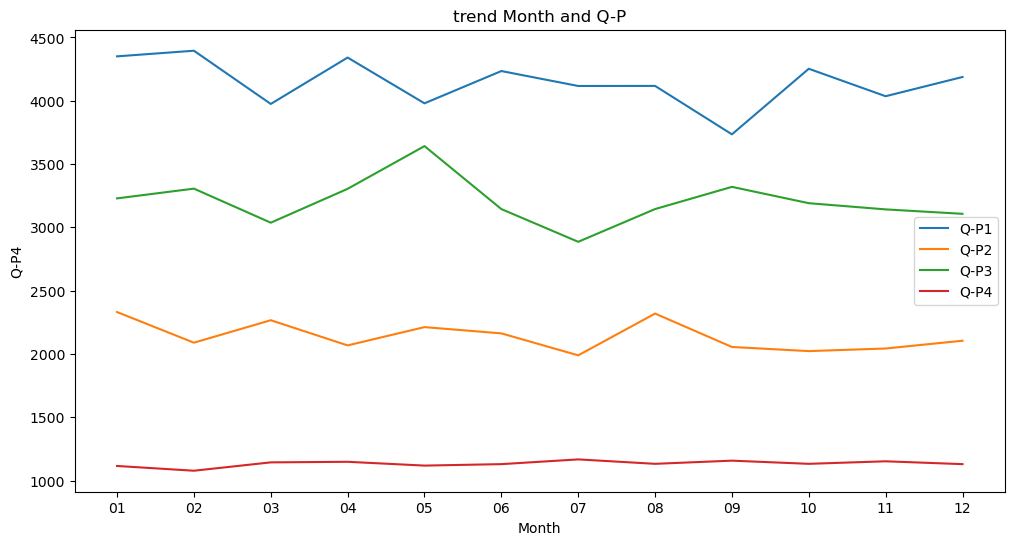

In [173]:
sample = data1
plt.figure(figsize=(12, 6))
for col in data1.columns[:-5]:
    # moving_average = sample[col].rolling(window=10).mean()
    plt.plot(sample['Month'], sample[col], label=col)

plt.xlabel('Month')
plt.ylabel(col)
plt.title('trend Month and ' + "Q-P")
plt.legend()
plt.show()

for data S (ratio scale)

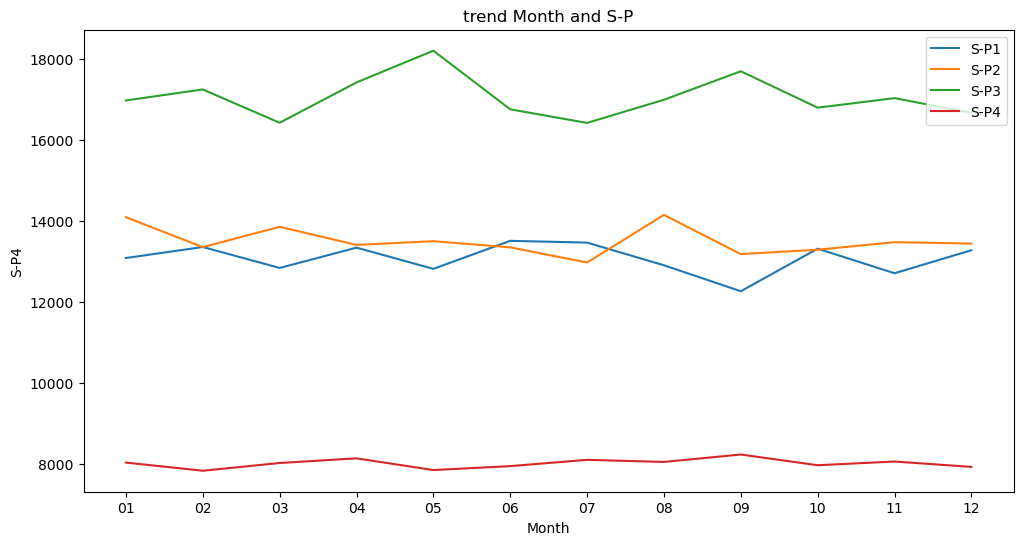

In [176]:
sample = data1
plt.figure(figsize=(12, 6))
for col in data1.columns[-5:-1]:
    plt.plot(sample['Month'], sample[col], label=col)

plt.xlabel('Month')
plt.ylabel(col)
plt.title('trend Month and ' + "S-P")
plt.legend()
plt.show()

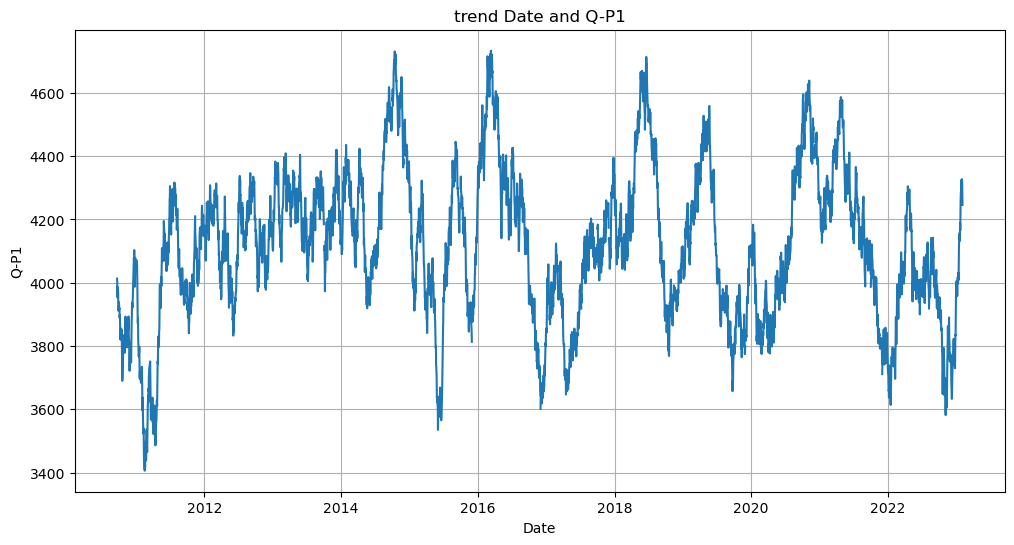

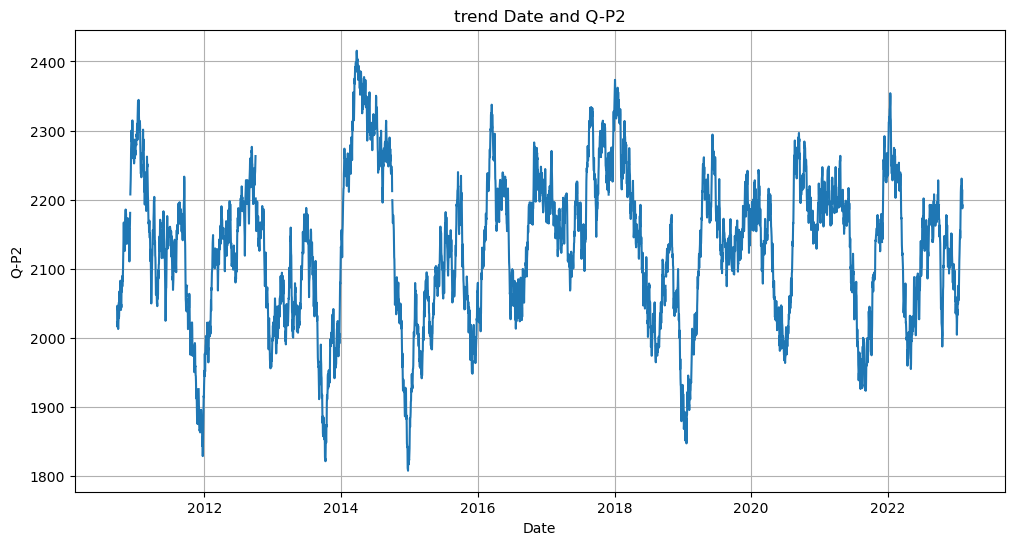

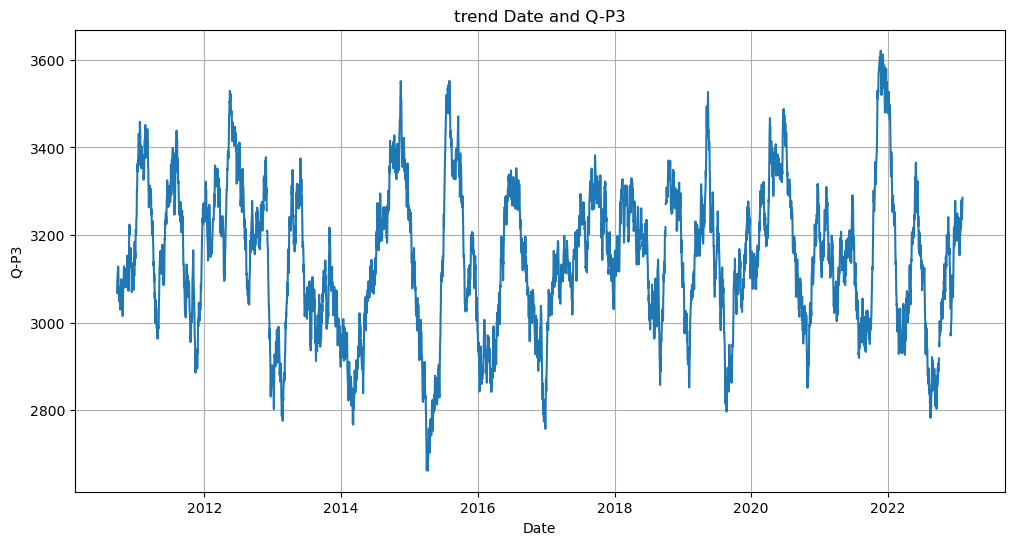

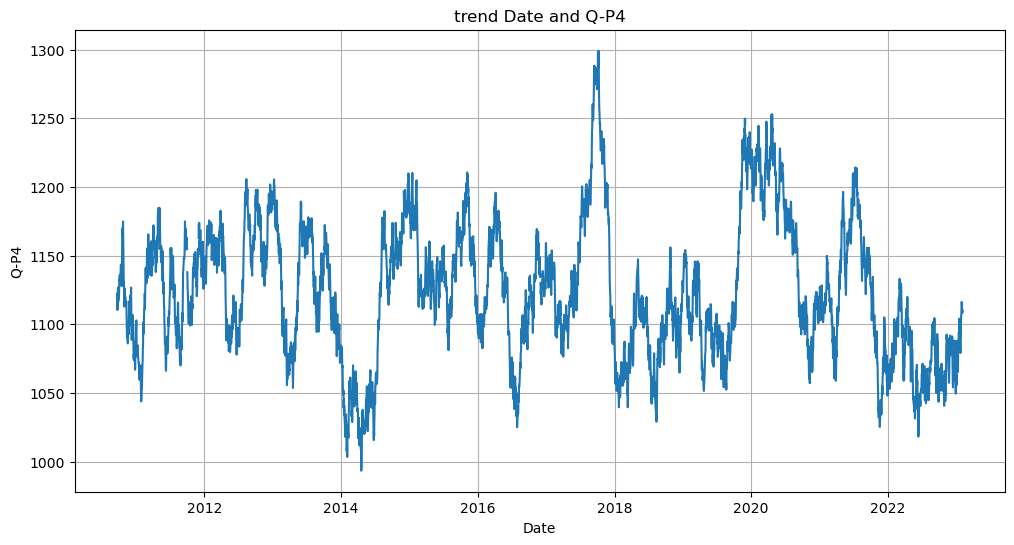

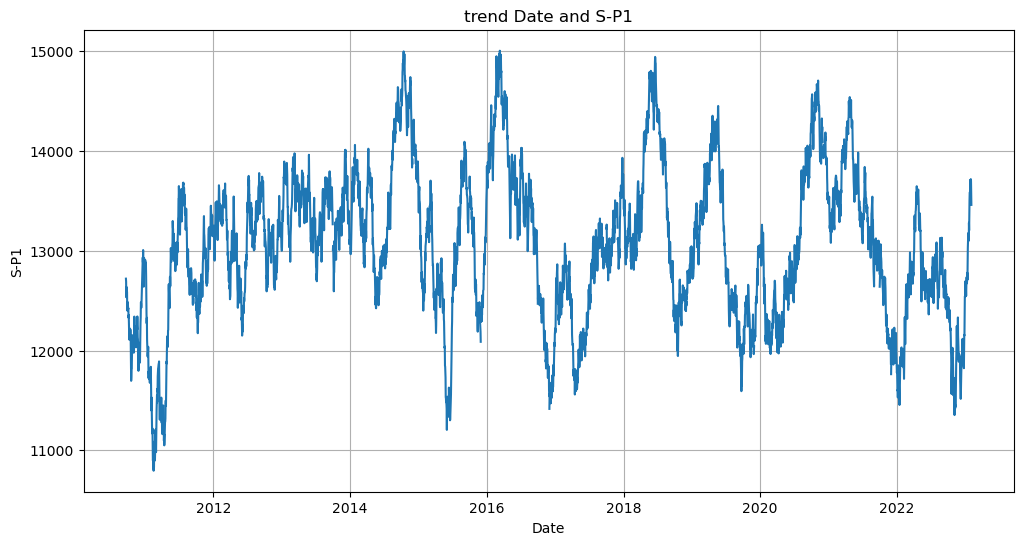

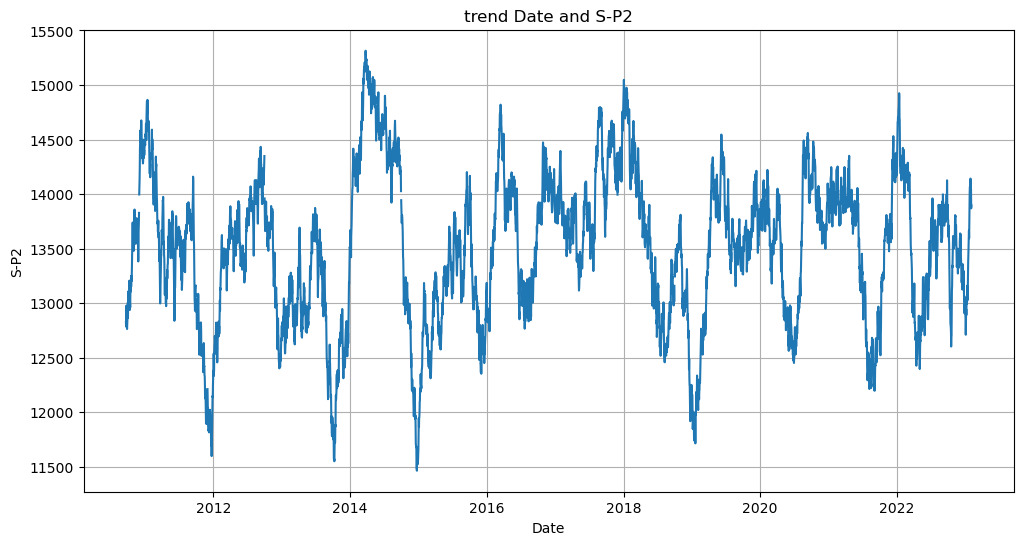

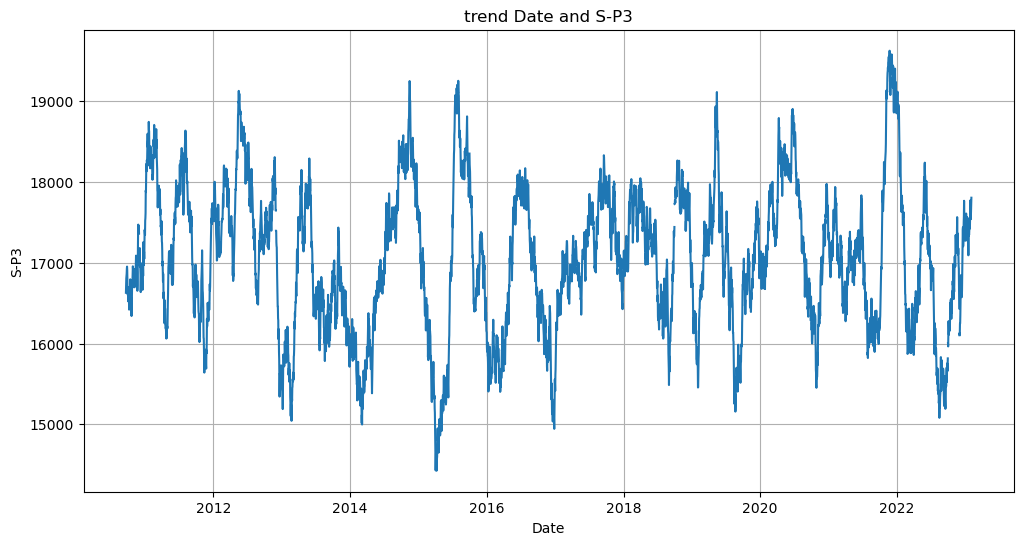

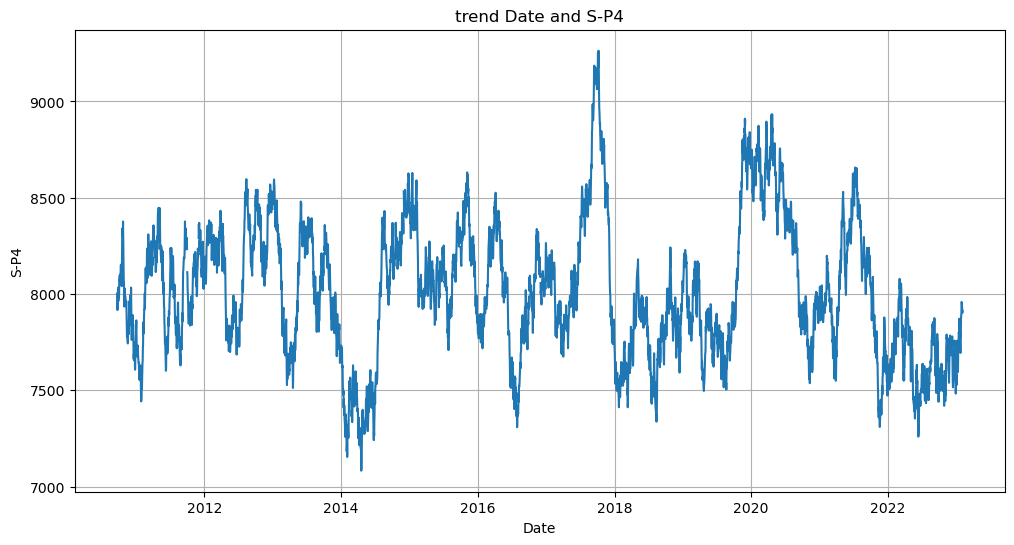

In [33]:
sample = data
for col in data.columns[2:-1]:
    # print(sample[col])
    # break
    plt.figure(figsize=(12, 6))
    moving_average = sample[col].rolling(window=100).mean()
    plt.plot(pd.to_datetime(sample['Date'], format='%d-%m-%Y', errors='coerce'), moving_average)
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.title('trend Date and ' + col)
    plt.grid(True)
    # Show the plot
    plt.show()

Index(['Unnamed: 0', 'Date', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2',
       'S-P3', 'S-P4', 'Month'],
      dtype='object')
Q-P1


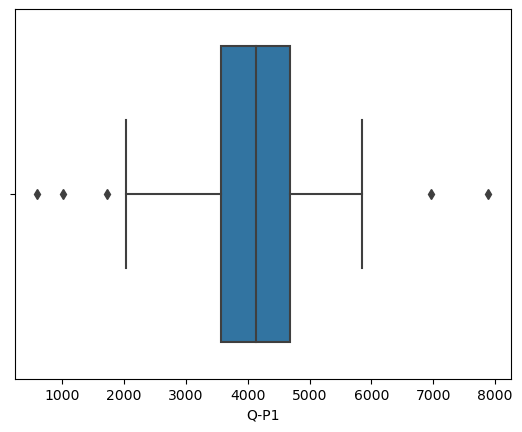

Q-P2


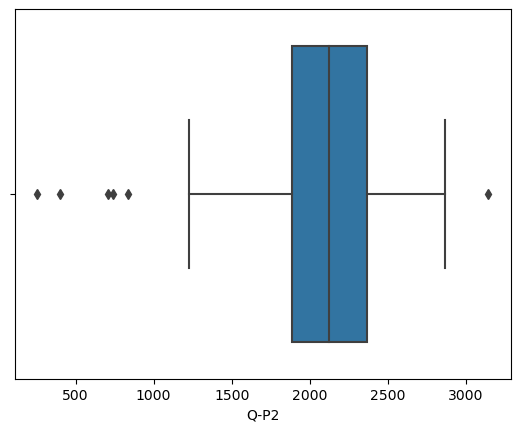

Q-P3


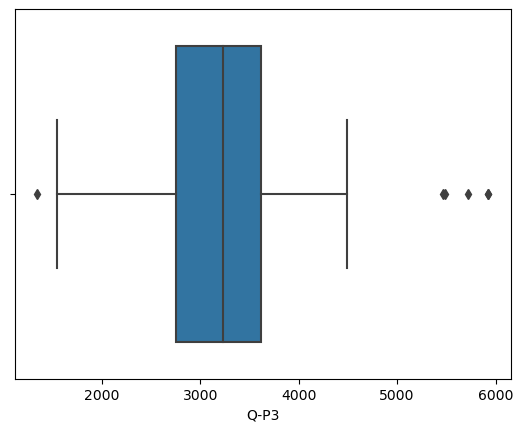

Q-P4


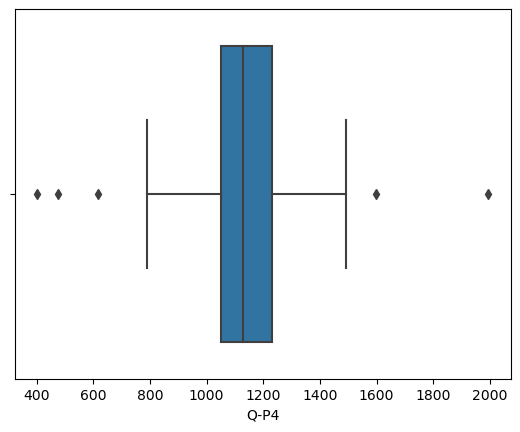

S-P1


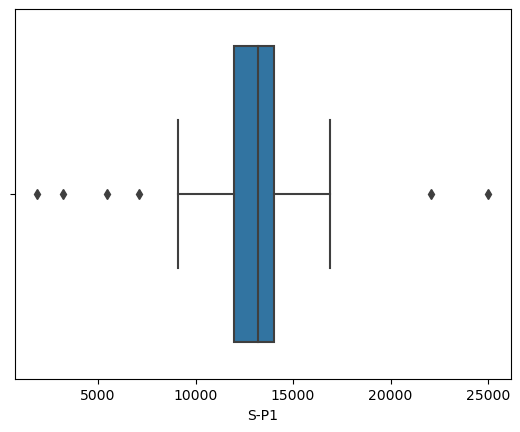

S-P2


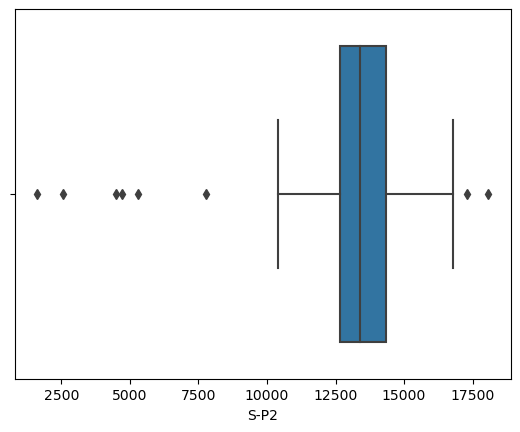

S-P3


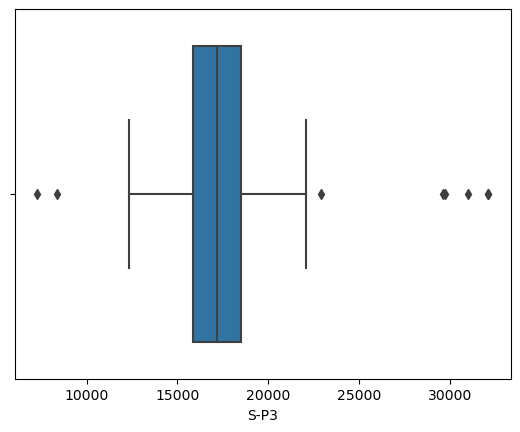

S-P4


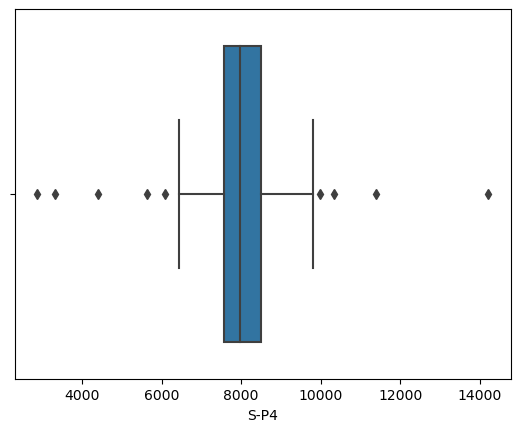

In [34]:
print(data.columns)
def boxPlotMonth(dataForPlot: pd.DataFrame):
    for col in data.columns[2:-1]:
        print(col)
        sns.boxplot(x=dataForPlot[col])
        plt.show()

boxPlotMonth(data1)

correlation test (spearman)

for only S

In [126]:
data1[data1.columns[-5:-1]].corr(method="spearman")

,S-P1,S-P2,S-P3,S-P4
S-P1,1.000000,-0.159223,-0.077736,-0.155467
S-P2,-0.159223,1.000000,0.007261,0.022397
S-P3,-0.077736,0.007261,1.000000,0.020093
S-P4,-0.155467,0.022397,0.020093,1.000000


In [127]:
data1[data1.columns[-5:-1]].corr(method="pearson")

,S-P1,S-P2,S-P3,S-P4
S-P1,1.000000,0.038198,-0.185536,-0.279483
S-P2,0.038198,1.000000,-0.063164,-0.013717
S-P3,-0.185536,-0.063164,1.000000,0.066525
S-P4,-0.279483,-0.013717,0.066525,1.000000


conclusion from correlation test method spearman we see that it no relation between any pair but in method pearson it seam like S-P1 and S-P4 have the score with -0.279 but it not enough to say that it have the relation between them